In [2]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
# 指定x为符号
x = sympy.Symbol('x')
# exp为公式
exp = np.e**x
# 下面开始求和,就求前21项的和吧
sums = 0
for i in range(20):
   # 求i次导函数
   numerator = exp.diff(x,i)
   # 计算导函数在x=0处的值
   numerator = numerator.evalf(subs={x:0})
   denominator = np.math.factorial(i)
   sums += numerator/denominator*x**i

In [6]:
exp.evalf(subs={x:0})-sums.evalf(subs={x:0})
# result is 0
xvals = np.linspace(0,20,100)

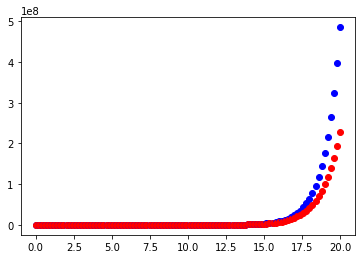

In [7]:
for xval in xvals:
    plt.plot(xval,exp.evalf(subs={x:xval}),'bo',xval,sums.evalf(subs={x:xval}),'ro')

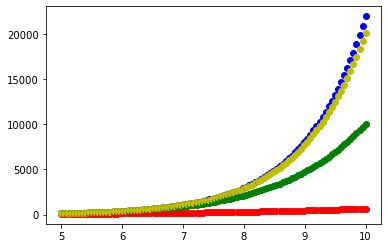

In [8]:
def polyApprox(func,num_terms):
  # 当我们需要反复做类似的步骤的时候，最好将步骤定义为一个函数
  sums = 0
  for i in range(num_terms):
      numerator = func.diff(x,i)
      numerator = numerator.evalf(subs={x:0})
      denominator = np.math.factorial(i)
      sums += numerator/denominator*x**i
  return sums

sum5 = polyApprox(exp,5)
sum10 = polyApprox(exp,10)

# 利用sympy我们也可以获得泰勒级数：
sum15 = exp.series(x,0,15).removeO()

xvals = np.linspace(5,10,100)
for xval in xvals:
  plt.plot(xval,exp.evalf(subs={x:xval}),'bo',\
           xval,sum5.evalf(subs={x:xval}),'ro',\
           xval,sum10.evalf(subs={x:xval}),'go',\
           xval,sum15.evalf(subs={x:xval}),'yo')

In [21]:
def taylorExpansion(func,var,expPoint,numTerms):
    return func.series(var,expPoint,numTerms)